Kmeans clustering - Drivers incentivization:
-----------------
Lith-ion provides battery for e-vehicles. Drivers get battery from them on rent basis. Based on the driving data we need to cluster the drivers into groups and provide incentives to them

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
#Read the dataset

df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
#View details of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
#Perform clustering into 2 labels at first

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop('id',axis=1)

In [7]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [8]:
# Get coordinates of cluster centres
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [9]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [10]:
# Get the count of each label
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


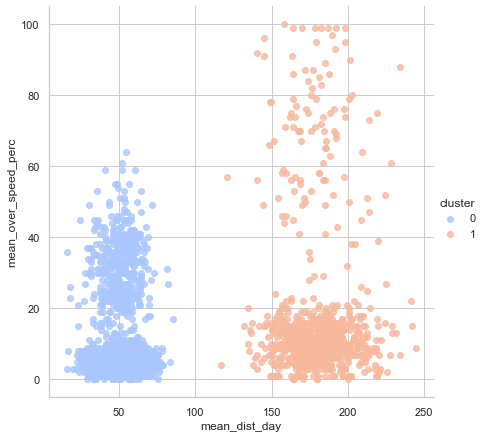

In [11]:
# Plot the data points
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc', data = df_analyze,
          hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [ ]:
# Here we can see 4 visible clusters in teh graph, so we try with 4 cluster in he algo

In [16]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df_analyze)
print(kmeans_4.cluster_centers_)

[[1.80343118e+02 1.05201149e+01 1.43678161e-03]
 [4.99842847e+01 5.21441441e+00 1.48792793e+00]
 [1.77835096e+02 7.02884615e+01 4.00000000e+00]
 [5.04612706e+01 3.24282353e+01 2.92000000e+00]]


In [17]:
print(len(kmeans_4.labels_))
print(type(kmeans_4.labels_))

4000
<class 'numpy.ndarray'>


In [18]:
unique,counts = np.unique(kmeans_4.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 696, 1: 2775, 2: 104, 3: 425}


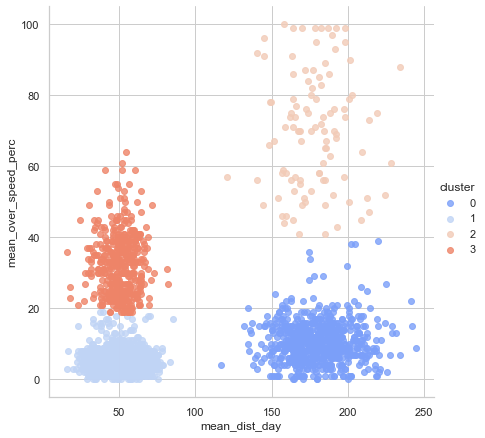

In [19]:
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc', data = df_analyze,
          hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

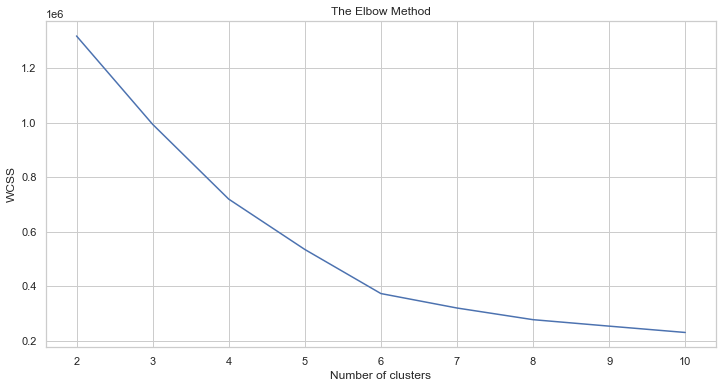

In [20]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

distance = []
cluster_number = range(2,11)
#Checking how the clusters and the distances are for the no. of clusters ranging from 3 to 10
for i in cluster_number:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_analyze)
    distance.append(kmeans.inertia_) # within cluster sum
    
plt.plot(cluster_number, distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Using elbow method, we can see that the optimal number of clusters is 6.

In [21]:
kmeans_6 = KMeans(n_clusters=6)
kmeans_6.fit(df_analyze)
print(kmeans_6.cluster_centers_)

[[4.15200962e+01 5.39600296e+00 1.01480385e+00]
 [1.96703172e+02 1.13051360e+01 3.02114804e-02]
 [5.06142184e+01 3.30620347e+01 3.00000000e+00]
 [1.76551122e+02 7.18469388e+01 2.00000000e+00]
 [1.66045553e+02 1.03746631e+01 5.39083558e-03]
 [5.78570194e+01 5.28215768e+00 1.01659751e+00]]


In [22]:
unique,counts = np.unique(kmeans_6.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 1348, 1: 330, 2: 403, 3: 98, 4: 372, 5: 1449}


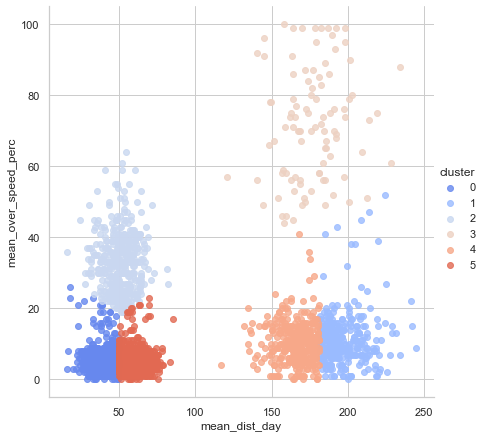

In [23]:
df_analyze['cluster'] = kmeans_6.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc', data = df_analyze,
          hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)